# Motivation

In the previous lab, we have gotten acquainted with building/training/testing a linear regression of degree 1 model and associated metrics (MSE and R2 score). We chose appropriate variables (a high correlation coefficient) to showcase a 'good' linear fit.

Today, we want to choose variables where the relationship could be better characterized by a higher degree curve. We will examine if overfitting, underfitting, or a good fit was achieved.



# Background

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline. [https://scikit-learn.org/stable/datasets/toy_dataset.html]

Attribute information



1.   age (age in years)
2.   sex
3.   bmi (body mass index)
4.   bp (average blood pressure)
5.   s1 tc, total serum cholesterol
6.   s2 ldl, low-density lipoproteins
7.   s3 hdl, high-density lipoproteins
8.   s4 tch, total cholesterol / HDL
9.   s5 ltg, possibly log of serum triglycerides level
10.  s6 glu, blood sugar level

Target information


1.   quantitative measure of disease progression one year after baseline





# Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

# Visualizing Initial Data

In [4]:
from sklearn.datasets import load_diabetes

In [5]:
(data, target) = load_diabetes(return_X_y= True, as_frame=True)

Use a heatmap to display the correlation matrix for this data

<AxesSubplot: >

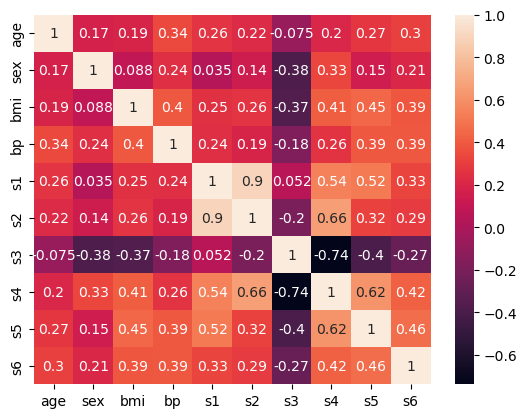

In [6]:
datacc = data.corr()
sns.heatmap(datacc, annot = True)

By inspecting this heatmap, list out as a comment a couple of variable pairs that seem suitable for a 'good' quadratic or cubic curve fitting. We want to avoid overfitting.

Hint 1 : You can inspect the heatmap to find a 'good' correlation coefficient. For a strong linear relationship, we looked for a 'high' correlation cofficient. What do you think we should look for in this case?

Hint 2 : You can make a plot (with lots of subplots) visualizing each pair that you feel could be a candidate and then visualizely decide on an appropriate variable pair

In [7]:
# s2 and s4, s4 and s5, s5 and s1

Choose one of the pairs you have listed to perform a linear regression fitting on

In [8]:
X = data[["s5"]]
Y = data["s1"]
linmodel = LinearRegression().fit(X,Y)

In [9]:
linmodel.coef_, linmodel.intercept_

(array([0.51550292]), -6.1724401863327e-17)

Display as a scatterplot the relationship between the two variables you have chosen

<AxesSubplot: xlabel='s5', ylabel='s1'>

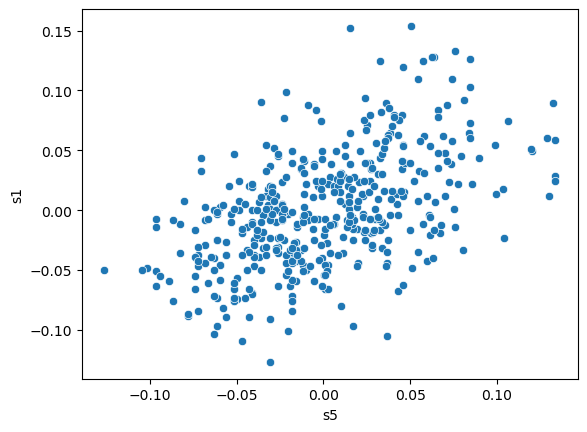

In [10]:
sns.scatterplot(data, x="s5", y="s1")

# Constructing Training & Testing Dataset

Before training your model, create your training and testing datasets. Decide on an appropriate size ratio for the two datasets.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .8, random_state = 1)

# Training a Linear Regression Model

Train your linear regression model and find the best fit line

In [12]:
lin_model = LinearRegression().fit(X_train.to_numpy().reshape(-1,1), y_train )
m = lin_model.coef_[0]
b = lin_model.intercept_
print(f'Best fit line is {round(m,3)}x + {round(b,3)}')
y_predicted=lin_model.predict(X_test.to_numpy().reshape(-1,1))
df = pd.DataFrame(X_test)
df['Known'] = y_test
df['Predicted'] = y_predicted

Best fit line is 0.55x + 0.003


Find the MSE for the model on both the training dataset and testing dataset. Also find the R2 score for both.

Do your results match up with what is expected? Justify in a few sentences.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .8, random_state = 1)
print ('test')
print ('MSE = ' + str(mse(df['Known'], df['Predicted'])))
print('R2 score = ' + str(lin_model.score(X_test.to_numpy().reshape(-1,1) , y_test)))

test
MSE = 0.00165497926993251
R2 score = 0.2429017320847603


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .8, random_state = 1)
ytrain_predicted=lin_model.predict(X_train.to_numpy().reshape(-1,1))
df2 = pd.DataFrame(X_train)
df2['Known'] = y_train
df2['Predicted'] = ytrain_predicted
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .8, random_state = 1)
print ('train')
print ('MSE = ' + str(mse(df2['Known'], df2['Predicted'])))
print('R2 score = ' + str(lin_model.score(X_train.to_numpy().reshape(-1,1) , y_train)))

train
MSE = 0.001745455594538272
R2 score = 0.3196594573646071


The MSE is very low and the R2 score is pretty low. This matches up with what I expected because the correlation coefficient between the two variables is .52. Thus, there is a moderate linear correlation between the two variables. Furthermore, because there is a large set of datapoints that are fairly concentrated, it is likely that the mean squared error is small but the regression may not be a through demonstration of how the data is shaped and correlated. 

# Training a Quadratic Regression Model

With the same variable pair you have selected, train a quadratic regression model of degree 2 on your data. Include all appropriate data visualizations. Find the MSE and R2 score for your model on both training and testing data. 

What were the results? What do these results imply? 

<AxesSubplot: xlabel='s5', ylabel='s1'>

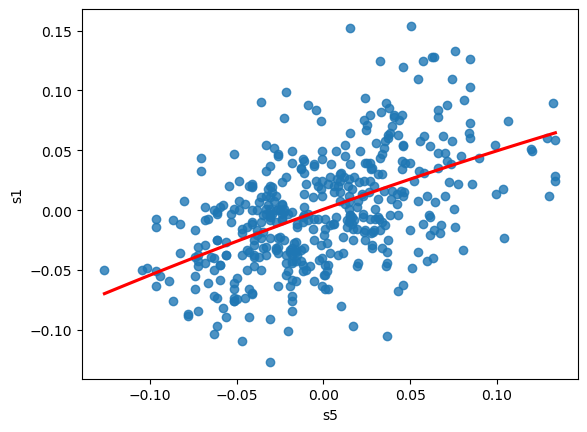

In [17]:
sns.regplot( data = data, x = "s5", y = "s1", order = 2 , ci = None, line_kws={'color':'red'} )

In [18]:
X_train['xtrainsquared'] = X_train ** 2
X_test['xtestsquared'] = X_test ** 2

In [19]:
quad_modeltrain = LinearRegression().fit( X_train.to_numpy(), y_train )
mtrain = quad_modeltrain.coef_
y_intercepttrain = quad_modeltrain.intercept_
print('"a" parameter: ', mtrain[0])
print('"b" parameter: ', mtrain[1])
print('"c" parameter: ', y_intercepttrain)
print(f"Equation of best quadratic curve is y = {round(mtrain[0], 3)}x^2 + {round(mtrain[1],3)}x + {round(y_intercepttrain,3)}")

"a" parameter:  0.5487968663381523
"b" parameter:  0.16393590083046136
"c" parameter:  0.0025793079652138865
Equation of best quadratic curve is y = 0.549x^2 + 0.164x + 0.003


In [21]:
X_test = X_test.to_numpy().reshape(-1,1)
X_test_sq = X_test ** 2

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .8, random_state = 1)
new_X_test = np.hstack((X_test,X_test))
print('MSE (testing) = ' +str(mse(y_test, quad_modeltest.predict(new_X_test))))

MSE (testing) = 0.002088836287718413


In [23]:
X_train = X_train.to_numpy().reshape(-1,1)
X_train_sq = X_train ** 2
new_X_train = np.hstack((X_train,X_train))
print('MSE (training) = ' +str(mse(y_train, quad_modeltrain.predict(new_X_train))))

MSE (training) = 0.0018184068074645324


In [24]:
print('R2 score (training) = ' + str(quad_modeltrain.score(new_X_train ,y_train)))

R2 score (training) = 0.291224664784684


In [25]:
print('R2 score (testing) = ' + str(quad_modeltest.score(new_X_test , y_test)))

R2 score (testing) = 0.044426498795600344


Equation of best quadratic curve is y = 0.549x^2 + 0.164x + 0.003
MSE (testing) = 0.002088836287718413
R2 score (testing) = 0.044426498795600344
MSE (training) = 0.0018184068074645324
R2 score (training) = 0.291224664

Overall, the mean squared error went up and the r2 score went down. These results imply that a quadratic regression model may not be the best fit or representation for this data. 

# Training a Cubic Regression Model

With the same variable pair you have selected, train a cubic regression model of degree 3 on your data. Include all appropriate data visualizations. Find the MSE and R2 score for your model on both training and testing data. 

What were the results? What do these results imply? 

<AxesSubplot: xlabel='s5', ylabel='s1'>

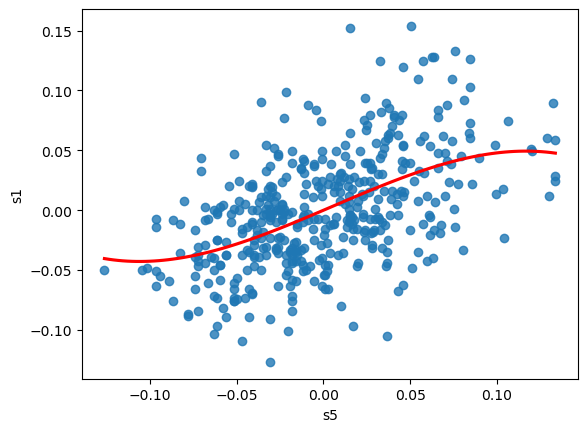

In [26]:
sns.regplot( data = data, x = "s5", y = "s1", order = 3 , ci = None, line_kws={'color':'red'} )

In [26]:
#Note: I found this code from a link that Saumya sent me and used it because the regression functions from quadratic and linear regression wasn't producing the results that I needed. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .8, random_state = 1)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
polynomial_features= PolynomialFeatures(degree=3)
x_polytrain = polynomial_features.fit_transform(X_train)

cubetrainmodel = LinearRegression().fit(x_polytrain, y_train)
y_poly_predtrain = cubetrainmodel.predict(x_polytrain)

rmsetrain = np.sqrt(mean_squared_error(y_train,y_poly_predtrain))
r2train = r2_score(y_train,y_poly_predtrain)
print('mse train =', rmsetrain)
print('r2 train = ', r2train)

cmtrain = cubetrainmodel.coef_
cy_intercepttrain = cubetrainmodel.intercept_
print('"c" parameter: ', cmtrain[0])
print('"b" parameter: ', cmtrain[1])
print('"a" parameter: ', cmtrain[2])
print('"d" parameter: ', cy_intercepttrain)
print(f"Equation of best cubic curve is y = {round(cmtrain[2], 3)}x^3 +␣{round(cmtrain[1],3)}x^2 + {round(cmtrain[0],3)}x + {round(cy_intercepttrain,3)}")

mse train = 0.04169610831175646
r2 train =  0.3223450861563919
"c" parameter:  0.0
"b" parameter:  0.6273210084602678
"a" parameter:  0.41344455366292465
"d" parameter:  0.0021395187580001683
Equation of best cubic curve is y = 0.413x^3 +␣0.627x^2 + 0.0x + 0.002


In [27]:
polynomial_features= PolynomialFeatures(degree=3)
x_polytest = polynomial_features.fit_transform(X_test)

cubetestmodel = LinearRegression().fit(x_polytest, y_test)
y_poly_predtest = cubetestmodel.predict(x_polytest)

rmsetest = np.sqrt(mean_squared_error(y_test,y_poly_predtest))
r2test = r2_score(y_test,y_poly_predtest)
print('mse test =', rmsetest)
print('r2 test = ', r2test)

mse test = 0.04026111487976158
r2 test =  0.25846562520860406


Equation of the best cubic curve is  = 0.413x^3 +␣0.627x^2 + 0.0x + 0.002
mse train = 0.04169610831175646
r2 train =  0.3223450861563919
mse test = 0.04026111487976158
r2 test =  0.25846562520860406

Overall, compared to the linear model, the mse went up and the r2 went up. Compared to the quadratic model, the mse went down and the r2 went up. This implies that the cubic model may be a better fit and representation for the data compared to the quadratic model, and the cubic model may be a better representation of the data compared to the linear model. 

# Metrics and Conclusion

Display the MSE (training), MSE (testing), R2 score (training), R2 score (testing) for each model (linear, quadratic, cubic). You can write it as a comment or any way that is easy for you.

What can you conclude from the results? What do your results imply? Is there a case of overfitting or underfitting or a good fitting going on? What would a case of over/underfitting look like (you can make a plot to show an example)? What would be the best model to use on the variable pair you selected? Include an analysis of the results.



<AxesSubplot: xlabel='s1', ylabel='s1'>

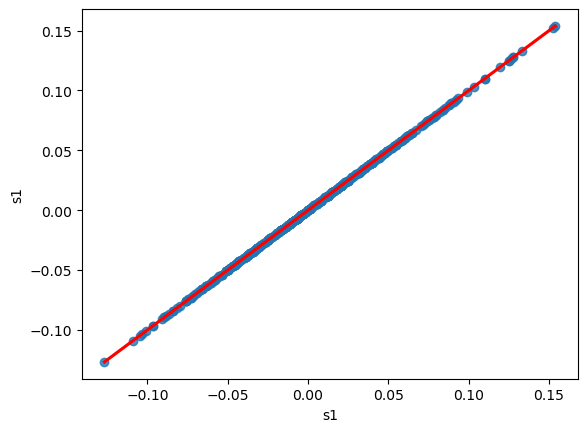

In [28]:
sns.regplot( data = data, x = "s1", y = "s1", order = 1 , ci = None, line_kws={'color':'red'} )

Linear model
y = 0.55x + 0.003
test
MSE = 0.00165497926993251
R2 score = 0.2429017320847603
train
MSE = 0.001745455594538272
R2 score = 0.3196594573646071
The mse is low meaning the linear model is a good fit but the r2 score is also relatively low meaning that there could be a model that is more representative or there are other variables at play. 

Quadratic model
y = 0.549x^2 + 0.164x + 0.003
MSE (testing) = 0.002088836287718413
R2 score (testing) = 0.044426498795600344
MSE (training) = 0.0018184068074645324
R2 score (training) = 0.291224664
The mse is higher than the linear model meaning that the linear model may be a better fit than the quadratic model and the  r2 score got lower meaning that the quadratic model is not the best representation of the data or there may be other variables at play. 

Cubic model
y = 0.413x^3 +␣0.627x^2 + 0.0x + 0.002
mse train = 0.04169610831175646
r2 train =  0.3223450861563919
mse test = 0.04026111487976158
r2 test =  0.25846562520860406
The mse is higher than the linear model and lower than the quadratic model meaning that the cubic model is a good fit but the linear model may be a better fit. The r2 score is higher than that of the linear and quadratic models but still relatively low meaning that the cubic model is the best representation of all three models but there may still be other variables at play. 

From these results, I can conclude that the linear model is the best fit for the data because it has the lowest mse score and the cubic model is the best representation of the data because it has the highest r2 score. This implies that the variables of s1 and s5 have some sort of linear relationship but there may be other variables present that explain the variation in s5. Furthermore, across the board, the mse and r2 scores are fairly low which implies that the none of the three regressions may be the best possible fit for the data. I believe that there is a case of underfitting going on because the low r2 values imply that the three regression models are all too simplistic to account for all of the variation in the data. A case of overfitting would look like the above graph where the model fits the training data very well but if any new data was introduced that existed outside of the training data, the model may be too complex to make accurate predictions. The best model to use on the variable pair that I selected would be the cubic model because the mse is still fairly low but the r2 is the highest of all three, meaning it is the most representative. 